# Reproducing Mapping Gaussian Process Priors to Bayesian Neural Networks

todo: explain framework, main ideas and equations

## Reproducing the results




In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader

import sys
sys.path.append('../src/')
from datasets import get_toy_data
from figures import plot_deciles, plot_prior, plot_posterior
from models import BayesianMLP
from train_inference import train, eval_1d_regression

# create dataset
x_train, y_train, x_val, y_val, x_all, y_all = get_toy_data(
    num_samples=70, sigma=0.1
)
dataloader_train = DataLoader(
    TensorDataset(x_train, y_train), batch_size=70, shuffle=True
)

### Comparing different priors

#### No activation function (and linear kernel)

In [2]:
dim_h = 20
n_layers = 2
activation = "nothing"

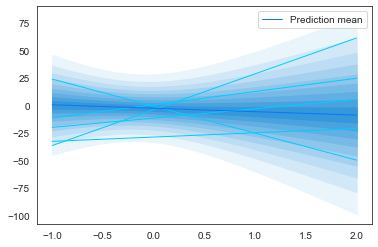

In [3]:
# default prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="normal",
    posterior_rho_init=-3.,
    prior_sigma=1.,
    activation=activation,
)
plot_prior(model, x_all)

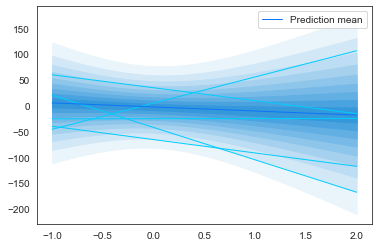

In [4]:
# mixture prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="mixture",
    # prior_sigma=prior_sigma,
    prior_pi=0.5,
    prior_sigma_1=2.,
    prior_sigma_2=0.01,
    posterior_rho_init=-3.,
    activation=activation,
)
plot_prior(model, x_all)

In [5]:
# optimized prior

In [6]:
# GP

#### ReLU activation (and ?? kernel)

In [7]:
dim_h = 20
n_layers = 2
activation = "relu"

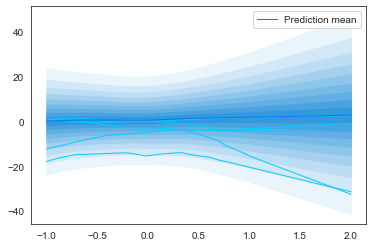

In [8]:
# default prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="normal",
    posterior_rho_init=-3.,
    prior_sigma=1.,
    activation=activation,
)
plot_prior(model, x_all)

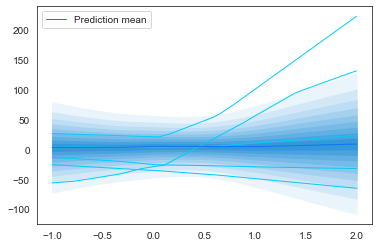

In [9]:
# mixture prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="mixture",
    # prior_sigma=prior_sigma,
    prior_pi=0.5,
    prior_sigma_1=2.,
    prior_sigma_2=0.01,
    posterior_rho_init=-3.,
    activation=activation,
)
plot_prior(model, x_all)

In [10]:
# optimized prior

In [11]:
# GP

#### RBF activation (and RBF kernel)

In [12]:
dim_h = 20
n_layers = 2
activation = "rbf"

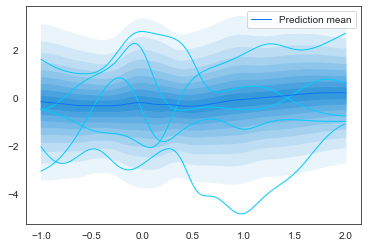

In [13]:
# default prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="normal",
    posterior_rho_init=-3.,
    prior_sigma=1.,
    activation=activation,
)
plot_prior(model, x_all)

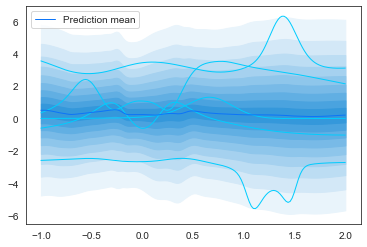

In [14]:
# mixture prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="mixture",
    # prior_sigma=prior_sigma,
    prior_pi=0.5,
    prior_sigma_1=2.,
    prior_sigma_2=0.01,
    posterior_rho_init=-3.,
    activation=activation,
)
plot_prior(model, x_all)

In [15]:
# optimized prior

In [16]:
# GP

#### Softplus activation (and RBF kernel)

In [17]:
dim_h = 20
n_layers = 2
activation = "softplus"

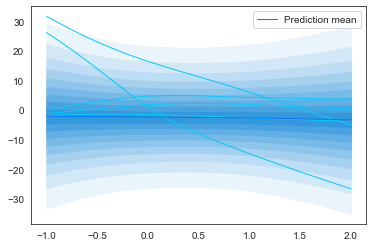

In [18]:
# default prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="normal",
    posterior_rho_init=-3.,
    prior_sigma=1.,
    activation=activation,
)
plot_prior(model, x_all)

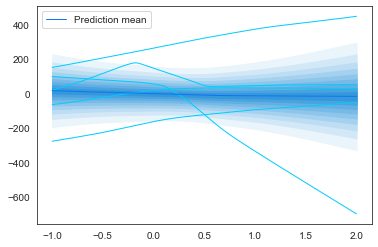

In [19]:
# mixture prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=dim_h,
    n_layers=n_layers,
    prior_type="mixture",
    # prior_sigma=prior_sigma,
    prior_pi=0.5,
    prior_sigma_1=3.,
    prior_sigma_2=0.01,
    posterior_rho_init=-3.,
    activation=activation,
)
plot_prior(model, x_all)

In [20]:
# optimized prior

In [21]:
# GP

### Regression task in small dimension


#### ReLU

MSE (train - mean of 30 BNN samples): 0.117673859000206


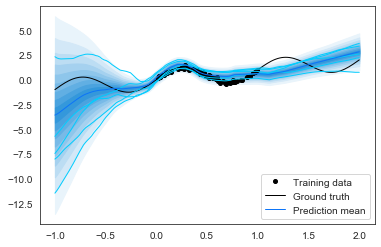

In [22]:
# mixture prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=512,
    n_layers=1,
    prior_type="mixture",
    prior_pi=0.45,
    prior_sigma_1=0.01, 
    prior_sigma_2=1.17,
    posterior_rho_init=-3.77,
    activation="relu",
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
model = train(
        model,
        optimizer,
        dataloader_train,
        n_epochs=150,
        evaluate_func=eval_1d_regression,
        evaluate_data=(x_train, y_train, x_val, y_val, x_all, y_all, 20),
        model_noise_var=1.,
        M=70,
)
plot_posterior(model, x_all, y_all, x_train, y_train)

#### RBF

MSE (train - mean of 30 BNN samples): 0.027595652267336845


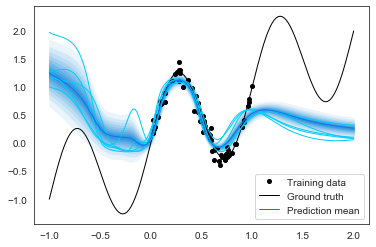

In [23]:
# mixture prior
model = BayesianMLP(
    dim_in=1,
    dim_out=1,
    dim_h=20,
    n_layers=2,
    prior_type="mixture",
    prior_pi=0.801,
    prior_sigma_1=0.083,
    prior_sigma_2=8.247,
    posterior_rho_init=-3.77,
    activation="rbf",
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
model = train(
        model,
        optimizer,
        dataloader_train,
        n_epochs=150,
        evaluate_func=eval_1d_regression,
        evaluate_data=(x_train, y_train, x_val, y_val, x_all, y_all, 20),
        model_noise_var=1.,
        M=70,
)
plot_posterior(model, x_all, y_all, x_train, y_train)

### Note: the critical role of activation functions
**todo: reformulate**

Papers states:
- “We found that we could not map GP priors to BNNs with certain activation functions”
- In particular, using a ReLU activation function “the BNN could not, at any capacity, learn the smoothness or periodic properties of any more interesting GP prior”

We also found that activation function played an essential role in the expressive power of BNNs. Notably, using ReLU activation function made it really difficult to learn a simple periodic function, where a classical MLP had no issue.

todo: plots of 1D regression with ReLU, for BNN (after careful hyper param optim on sigma1/2 + early stopping, still very sensitive to HP changes) and regular MLP + learning curves (stability issue)

## Scale-up study
todo: compare
- BNN, default N(0,1) prior
- BNN, mixture of gaussians, tune a bit?
- BNN, optimized prior to match GP
- GP
on classification tasks with different dimensions

And/or try changing the network architecture?

Experiments notes:

- N(0, sigma) prior (using my implementation of the prior and the posterior): studies `study_20210405_195311` and `study_20210405_200241` for hyper param studies (resp. TPE and random search), not successful. Study `study_20210406_203900` tries with complexity_cost=2^M-ep/2^M-1
- mixture of gaussians: 
    - initializing to match prior ("uninformative initialization"): fails, study `study_20210406_220210`
    - using random initialization from blitz, with default rho/mu init variance and dim_h=20, 2 layers: 
        - study `study_20210406_214519` (learning sigma1, sigma2, pi, model_noise), 
        - study `study_20210406_215017` (learning sigma1, sigma2, pi, model_noise=1.), 
        - study `study_20210406_215329` (learning sigma1, sigma2=1., pi=1., model_noise=1.) 
        - all are able to learn sine curves, but the uncertainty estimate is completely wrong (way too small)
    - using random init from blitz with default rho/mu (actually using blitz modules), but dim_h=512, relu, 1 hidden layer:
        - `study_20210408_091755`: good accuracy, but no stochasticity
        - `study_20210408_094404` with no early stopping and random search for more diversity
        - easier to learn, but uncertainty estimate still wrong
        - `study_20210408_095348`: trying with M=1 instead of M=70, to increase the role of the KL. Trial 2 ok !! (prior_pi=0.45, prior_sigma_1=0.01, prior_sigma_2=1.17) after ~300ep, but still unstable
    - back to rbf:
        - `study_20210408_193346`: fails (init seems wrong)
        - `study_20210408_194718`: try optimising/changing posterior_rho/mu_init as well, not much success
    - back to our implementation, with authors initialisation (random mu, fixed scale), rbf:
        - `study_20210408_202723`: 2 layers, h_dim=20, random scale parameter, seems better sometimes (trial 3: 'prior_sigma_1': 0.08324599639781513, 'prior_sigma_2': 8.246627085231355, 'prior_pi': 0.801549960333397, 'posterior_rho_init': -3.772311600494804)
        - `study_20210408_204449` 1 layer, h_dim=512